# Trabajo final Grupo 3 - Digital Transformation 

### Tema seleccionado: 

+ **Elecciones Generales**

### Integrantes:

+ Fernando Martinez
+ Inmaculada Latorre
+ Fernando Lominchar
+ Andres Plazas

## Introducción 

Este trabajo tiene como objetivo analizar los datos de las elecciones generales del 2019 con enfoque en la ciudad de Madrid. Para complementar el análisis, se suman los datos del Padron municipal, discriminados por distrito y barrio. Los datos de las elecciones se obtuvieron directamente del [Ayuntamiento de Madrid](http://www-2.munimadrid.es/CSE6/control/seleccionDatos?numSerie=7010301013), al igual que los datos del [Padron Municipal](http://www-2.munimadrid.es/TSE6/control/seleccionDatosBarrio). 

Dado la complejidad de factores que pueden llegar a incidir sobre el criterio de una persona cuando se trata de ejercer el voto por uno u otro partido político, en esta ocación, únicamnte se van se analizaran los siguientes puntos:

+ 1 Teniendo en cuenta que el PSOE es un partido de izquierda, se analizará si la influencia de la edad en el total de votos obtenidos, por distrito.  
+ 2
+ 3

Cada uno de los puntos mencionados anteriormente tendra un apartado dentro del trabajo; será posible seguir el razonamiento utilizado y observar los resultados obtenidos. 

A continuación, como primer paso, previo a cualquier análisis, se muestra el proceso de limpieza y adecuación de tablas. 

## Carga de las tablas correspondientes a las elecciones

Se descargaron las 21 tablas disponibles en la pagina del Ayuntamiento de Madrid. Cada una de ellas corresponde a un distrito, y contiene la siguiente información: 

+ Distrito
+ Barrio
+ Censo electoral
+ Abstención
+ Votos blancos 
+ Votos nulos
+ Total votos_a_candidaturas 
+ CNTG+ 
+ Cs
+ FE de las JONS
+ IU-MpM
+ M.I.
+ MAS MADRID
+ MCE
+ P-LIB
+ P.C.P.E.
+ P.P.
+ P.S.O.E. 
+ PACMA
+ PCAS-TC-PPCCAL-PACTO
+ PCTE
+ PH
+ PUM+J
+ ULEG
+ UPyD
+ VOX

A continuación se observa el código implementado para leer, limpiar, y contatenar toda la información en una gran tabla: "main_table_elecciones"


In [1]:
import pandas as pd
import os
import re
import numpy as np
import math

path = "resources/Tablas_elecciones_barrio/"
files = ""    

In [2]:
tables = []
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f

# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
contador = 0
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file), 
                              sep=";", encoding="ISO-8859-1", convert_float=True)
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
    tmp_table.drop([0,1], inplace=True)
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", tmp_table.iloc[i,0].upper())
        tmp_table.iloc[i,0] = re.sub(" ", "", tmp_table.iloc[i,0].upper())
        if 'Á' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("Á", "A", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'É' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("É", "E", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Í' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Í", "I", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ó' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ó", "O", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ú' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ú", "U", str.strip(tmp_table.iloc[i,0].upper()))
#     Corrección de la utilización del punto como notación para las cifras indicadas en miles
    for j in range(0, len(tmp_table.columns)):
        if type(tmp_table.iloc[0,j]) is not str:
            tmp_table.iloc[:,j] = tmp_table.iloc[:,j].astype(np.float32)
            for i in range(0, len(tmp_table.iloc[:,j])):
                num_split = math.modf(tmp_table.iloc[i,j])
                num_split = [str(round(num_split[0],3)), str(num_split[1])]
                num_split[0] = re.sub("^[0](\.)", "", num_split[0])
                if num_split[0] == '0':
                    num_split[0] = ''
                
                num_split[1] = re.sub("(\.)[0]$", "", num_split[1])
                tmp_table.iloc[i,j] = int(num_split[1] + num_split[0])
        
    tables.append(tmp_table)

# # Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=True)
# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones.head()


# Pendientes
#  OK 1 -La columna "Barrio" debe contener solo el nombre del barrio. Para el código se debe crear una nueva columna "Codigo"
# 2 -Crear una nueva columna en donde se puedan observar los porcentajes de abstención
#  OK 3- Poner el nombre del distrito (por ejemplo 'Centro') en una columna -"Distrito"- para todos los barrios que pertenecen a él


,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,PCAS-TC-PPCCAL-PACTO,PCTE,PH,PUM+J,Total_votos_a_candidaturas,ULEG,UPyD,VOX,Votos_blancos,Votos_nulos
0,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,3.0,1.0,0.0,7.0,12369.0,1.0,8.0,724.0,50.0,47.0
1,10829.0,EMBAJADORES,28.0,31496.0,212.0,CENTRO,7.0,1443.0,12.0,11166.0,...,14.0,6.0,6.0,7.0,20517.0,0.0,11.0,949.0,94.0,56.0
2,2466.0,CORTES,6.0,7755.0,779.0,CENTRO,2.0,188.0,1.0,241.0,...,1.0,3.0,2.0,2.0,5246.0,0.0,3.0,300.0,27.0,16.0
3,4225.0,JUSTICIA,9.0,12838.0,1518.0,CENTRO,6.0,183.0,4.0,3502.0,...,0.0,0.0,1.0,6.0,8554.0,0.0,13.0,594.0,37.0,22.0
4,7683.0,UNIVERSIDAD,19.0,23738.0,2296.0,CENTRO,13.0,527.0,4.0,7932.0,...,6.0,5.0,3.0,6.0,15951.0,2.0,11.0,822.0,56.0,48.0


# Carga de los datos del Padron

Los datos del Padron municipal fueron obtenitos, al igual que los datos de las elecciones, desde la página del Ayuntamiento de Madrid. La última fecha de actulización de los datos fue 1 de noviembre del presente año. Estan discriminados por distrito y barrio, y contienen la siguiente información:

+ Distrito 
+ Barrio
+ Edad
+ Españoles Hombres
+ Españoles Mujeres
+ Españoles Total
+ Extranjeros Hombres
+ Extranjeros Mujeres
+ Extranjeros Total
+ Total Hombres 
+ Total Mujeres
+ Total

Se descargó una única tabla contoda la información, debido a ello, la tabla requirió de un gran trabajo de limpieza y ajuste. A continuación, se muestra el código implementado para obtener la tabla "main_table_padron".

In [3]:
import pandas as pd


# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")

In [4]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True))
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.head(5)


,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263.0,238.0,501.0,56.0,50.0,106.0,319.0,288.0,607.0,CENTRO,PALACIO
1,5 - 9,235.0,265.0,500.0,43.0,38.0,81.0,278.0,303.0,581.0,CENTRO,PALACIO
2,10 - 14,227.0,238.0,465.0,30.0,38.0,68.0,257.0,276.0,533.0,CENTRO,PALACIO
3,15 - 19,234.0,282.0,516.0,44.0,55.0,99.0,278.0,337.0,615.0,CENTRO,PALACIO
4,20 - 24,323.0,346.0,669.0,161.0,212.0,373.0,484.0,558.0,1042.0,CENTRO,PALACIO


In [5]:
# Homegenizar los nombres de los distritos

# vector_distritos = list(pd.unique(main_table_elecciones.Distrito))
# print(vector_distritos)
# vector_districos_padron = list(pd.unique(main_table_padron.Distrito))
# print(vector_districos_padron)
# main_table_elecciones[main_table_elecciones.Distrito == vector_distritos[2]]

# PENDIENTE REPARAR ESTO DE LOS NONOMBRE de los barrios

# print(main_table_elecciones[main_table_elecciones.Barrio == 'CASCO HISTORICO DE VALLECAS'])
# print(main_table_padron[main_table_padron.Distrito == 'VILLADEVALLECAS'])


A continuación, se realiza un *merge* de las dos tablas anteriores por 'Distrito' y 'Barrio' para obtener una única tabla con toda la información. La tabla resultante se almacena en la variable "work_table".

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Parte 1 - Realación entre los votos obtenidos por el PSOE y la edad 

El primer paso para determinar si existe o no alguna relación entre la edad y los votos obtenidos por el PSOE, es obtener el número de personas jovenes por Distrito. Dento de esta categoría están las personas entre los 20 y 34 años.

In [7]:
# Selección de las personas de 20 a 34 años
rangos_edades = pd.unique(work_table.Edad)
rango_edades_jovenes = np.delete(rangos_edades, [0,1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

# Selección de las personas mayores de 34 años
rango_edades_no_jovenes = np.delete(rangos_edades, [0,1,2,3,4,5,6])

El siguiente bloque de códidgo contiene las dos funcionese que se utilizaran para extraer información de la tabla *work_table*

In [8]:
# Fuciones para consultar la tabla general y obtener información 
def seleccionar_data_por_edad(edades, col_padron, func):
    """Esta funcion únicamente sirve para agrupar datos de la tabla por categorias de edad"""
    temp_one = work_table[work_table['Edad'].isin(edades)].copy(deep=True)
    temp = temp_one.groupby(['Distrito']).agg({col_padron: func}).reset_index()
    return temp

def seleccionar_data_por_columna(columna):
    """ESta función sirve para extraer, únicamente, infomración relacioanda con las elecciones, NO utilizar con columnas
    relacioandas con el Padron"""
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({columna: 'max'}).reset_index()
    temp = temp.groupby(['Distrito',]).agg({columna: 'sum'}).reset_index()
    return temp

In [9]:
# Numero de personas por distrito entre los 20 y 34 años
numero_jovenes_distrito = seleccionar_data_por_edad(rango_edades_jovenes, 'Total', 'sum').sort_values('Distrito')

# Numero de personas mayores de 34 años
numero_no_jovenes_distrito = seleccionar_data_por_edad(rango_edades_no_jovenes, 'Total', 'sum').sort_values('Distrito')

# Organizar los datos para graficar.
numero_jovenes_distrito['Total_adultos'] = numero_no_jovenes_distrito.Total
numero_jovenes_distrito = numero_jovenes_distrito.sort_values('Total', ascending=False)

En la siguiente gráfica se observan los resultados obtenidos. Se puede ver que según el Padron, Puente de Vallecas es el distrito con el mayor número de jovenes, seguido por Carabalchel.

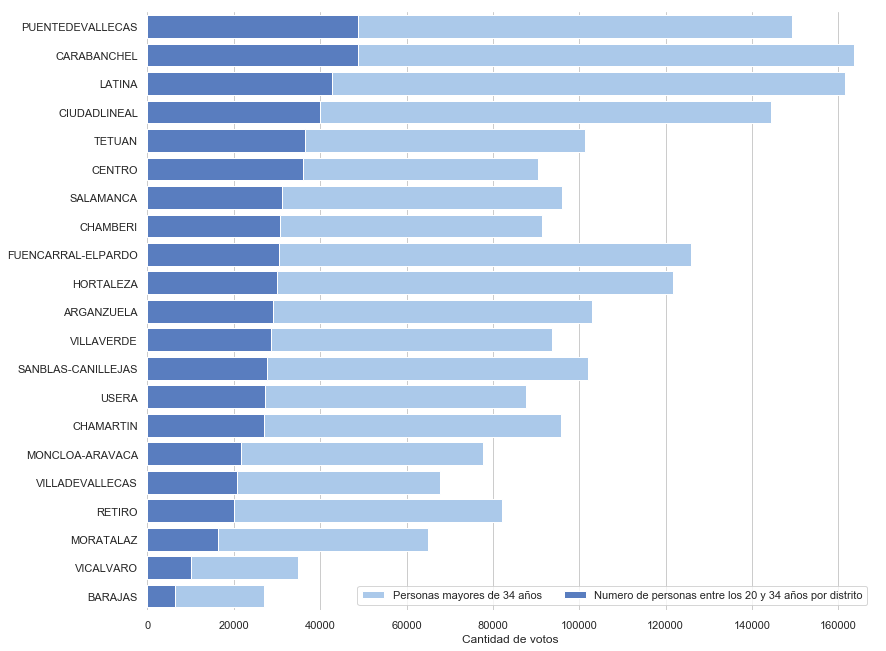

In [10]:
# # Se organiza de mayore a menor
# data_joven = numero_v_distrito_joven.sort_values('Total', ascending=False)
# data_psoe = votos_psoe_distrito.sort_values('P.S.O.E.', ascending=False)

# Se plotea la gráfica para ver los votos del PSOE por Distrito
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total_adultos", data=numero_jovenes_distrito,
            label="Personas mayores de 34 años", color="b")

sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='Total', data=numero_jovenes_distrito,
            label="Numero de personas entre los 20 y 34 años por distrito",  color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 168000), ylabel="",
       xlabel="Cantidad de votos", ylabel='Distrito')
sns.despine(left=True, bottom=True)

Ahora, se procede a hallar el distrito en el que el PSOE obtuvo mayor cantidad de votos, con el objetivo de graficarlo contra el número de personas jovenes. Se espera ver que en los barrios con el mayor número de jovenes, la votación del partido sea mayor.


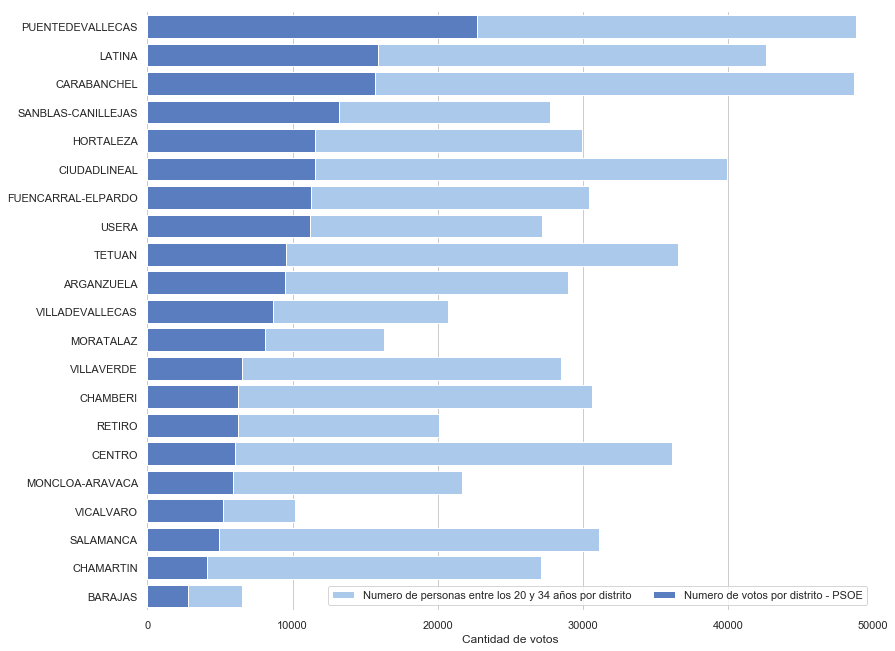

In [11]:
# Numero de votos para el PSOE pror distrito
votos_psoe_distrito = seleccionar_data_por_columna('P.S.O.E.')

# Se organiza el total de votos del PSOE en orden descentente
votos_psoe_distrito = votos_psoe_distrito.sort_values('Distrito')

# Se organizan los jovenes por distrito
numero_jovenes_distrito_new = numero_jovenes_distrito.sort_values('Distrito')
numero_jovenes_distrito_new['P.S.O.E.'] = votos_psoe_distrito['P.S.O.E.']
numero_jovenes_distrito_new = numero_jovenes_distrito_new.sort_values('P.S.O.E.', ascending=False)

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total", data=numero_jovenes_distrito_new,
            label="Numero de personas entre los 20 y 34 años por distrito", color="b")

sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='P.S.O.E.', data=numero_jovenes_distrito_new,
            label="Numero de votos por distrito - PSOE",  color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50000), ylabel="",
       xlabel="Cantidad de votos", ylabel='Distrito')
sns.despine(left=True, bottom=True)

Como se observa en la gráfica anterior, los barrios Puente de Vallecas, Latina y Carabanchel son los distritos con mayor número de jovenes, y a su vez, con el meyor numero de votos para el PSOE. Esto, nos permite afirmar que, de alugna forma, existe una realción entre la edad y este partido politico. 

Ahora, con el objetivo de ver cómo influye la población migrante en la votación por el PSOE en los tres distritos mencionados anteriormente, se graficará la contidad de migrantes contra los votos del PSOE.

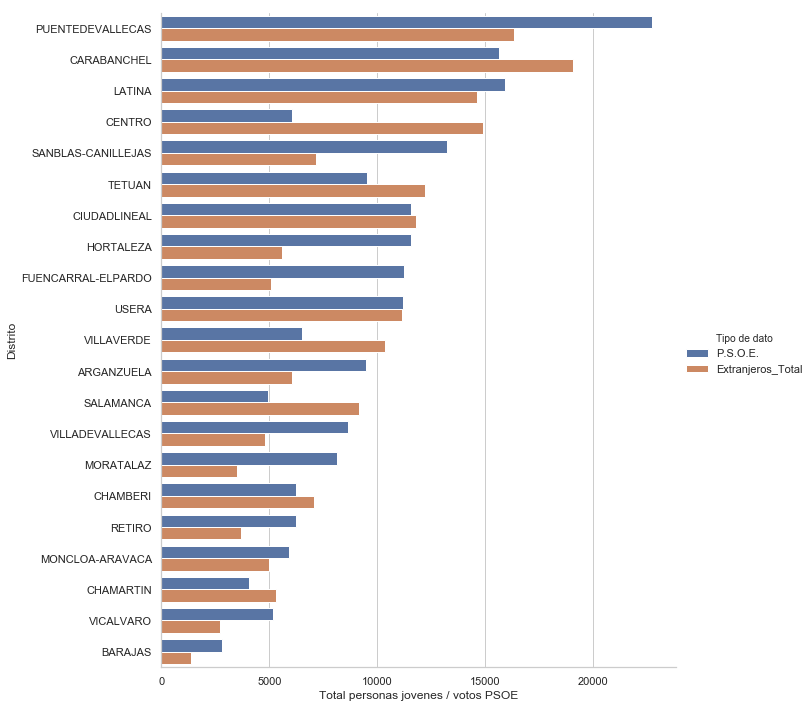

In [12]:
# Se extraen los datos de los jovenes migrantes de la tabla
jovenes_migrantes_distrito = seleccionar_data_por_edad(rango_edades_jovenes, 
                                                       'Extranjeros_Total', 
                                                       'sum').sort_values('Distrito')

# Se agega la columna de que contiene la cantidad de votos del PSOE por distrito
jovenes_migrantes_distrito['P.S.O.E.'] = votos_psoe_distrito['P.S.O.E.']

# Se hace un melt de la tabla para graficar utilizando las dos barras una al lado de la otra
tabla_para_grafica = jovenes_migrantes_distrito.melt(id_vars='Distrito')

# Se modifican los titulos de las columnas y se organiza de mayor a menor Pot la columna 'Total'
tabla_para_grafica.columns = ['Distrito', 'Tipo de dato', 'Total']
tabla_para_grafica = tabla_para_grafica.sort_values('Total', ascending=False)

# Se plotea el resultado 
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

q = sns.catplot(y="Distrito" , x='Total', 
                hue='Tipo de dato', 
                data=tabla_para_grafica,  
                kind='bar', 
                height=10, aspect= 1)

q.set_ylabels("Distrito")
q.set_xlabels("Total personas jovenes / votos PSOE")
plt.show()

En la gráfica anterior, es posible observar que la mayoria de extranjeros jovenes reside en Puente de Vallecas, Latina y Carabanchel. A esta lista se suma Centro con un numero importante de extranjeros. Cabe aclarar que no podemos afirmar que los jovenes que se tuvieron en cuenta para este estudio votaron por el PSOE, pues todos son libres de apoyar diferentes partidos. unicamente que se pretende resaltar el hecho qde que en los distritos con mayro numero de jovenes y jovenes extranjeros, el PSOE obtuvo la mayoria de sus votos. 

In [13]:
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                
                tmp_table = pd.read_excel("resources/renta_por_barrios.xlsx", 
                              sep=";", encoding="ISO-8859-1")
                print(tmp_table.columns)
                tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
                tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
                tmp_table.drop([0,1], inplace=True)
                for i in range(0, len(tmp_table.Barrio)):
                    tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", str.strip(tmp_table.iloc[i,0].upper()))
                      
                tables.append(tmp_table)
                break
        separador_tabla += 1

Index(['DISTRITO', 'RENTA_MEDIA'], dtype='object')


AttributeError: 'DataFrame' object has no attribute 'Barrio'